In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
from bs4 import BeautifulSoup
import re

In [64]:
df = pd.read_csv('/kaggle/input/ourrawdata/Collected_data3K.csv')

In [65]:
df.head()

,id,sentence1,sentence2,label,entity,aspect
0,1000,location - 1 is one of the most expensive area...,location - 1 - price,Negative,location - 1,price
1,1002,"alternatively , location - 1 ' s likely the cl...",location - 1 - price,Positive,location - 1,price
2,1002,"alternatively , location - 1 ' s likely the cl...",location - 1 - transit location,Positive,location - 1,transit location
3,1003,"location - 1 , se4 it is a beautiful late-vict...",location - 1 - general,Positive,location - 1,general
4,1004,will add to it when i think of more lol at fir...,location - 1 - general,Positive,location - 1,general


In [66]:
df['len'] = list(map(lambda x: len(str(x).split(' ')),df['sentence1']))
df['len2'] = list(map(lambda x: len(str(x).split(' ')),df['sentence2']))
df.head()

,id,sentence1,sentence2,label,entity,aspect,len,len2
0,1000,location - 1 is one of the most expensive area...,location - 1 - price,Negative,location - 1,price,12,5
1,1002,"alternatively , location - 1 ' s likely the cl...",location - 1 - price,Positive,location - 1,price,32,5
2,1002,"alternatively , location - 1 ' s likely the cl...",location - 1 - transit location,Positive,location - 1,transit location,32,6
3,1003,"location - 1 , se4 it is a beautiful late-vict...",location - 1 - general,Positive,location - 1,general,16,5
4,1004,will add to it when i think of more lol at fir...,location - 1 - general,Positive,location - 1,general,20,5


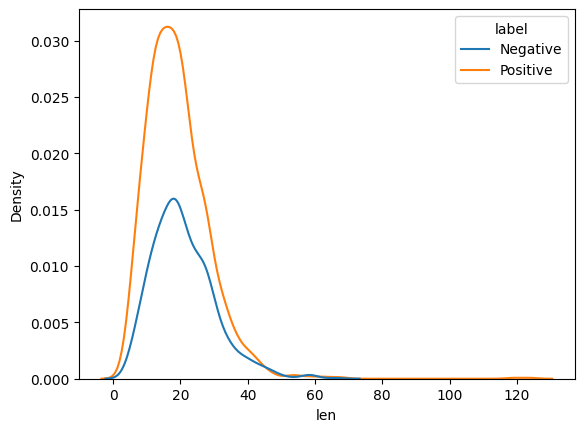

In [68]:
sns.kdeplot(x='len', hue='label', data=df)
plt.show()

In [69]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['sentence1']  = df['sentence1'].apply(remove_html_tags)
df['sentence2']  = df['sentence2'].apply(remove_html_tags)
df.head()

/tmp/ipykernel_47/1503637077.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,id,sentence1,sentence2,label,entity,aspect,len,len2
0,1000,location - 1 is one of the most expensive area...,location - 1 - price,Negative,location - 1,price,12,5
1,1002,"alternatively , location - 1 ' s likely the cl...",location - 1 - price,Positive,location - 1,price,32,5
2,1002,"alternatively , location - 1 ' s likely the cl...",location - 1 - transit location,Positive,location - 1,transit location,32,6
3,1003,"location - 1 , se4 it is a beautiful late-vict...",location - 1 - general,Positive,location - 1,general,16,5
4,1004,will add to it when i think of more lol at fir...,location - 1 - general,Positive,location - 1,general,20,5


In [70]:
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['sentence1'] = df['sentence1'].apply(remove_special_characters)
df['sentence2'] = df['sentence2'].apply(remove_special_characters)

df.head()

,id,sentence1,sentence2,label,entity,aspect,len,len2
0,1000,location is one of the most expensive areas ...,location price,Negative,location - 1,price,12,5
1,1002,alternatively location s likely the closes...,location price,Positive,location - 1,price,32,5
2,1002,alternatively location s likely the closes...,location transit location,Positive,location - 1,transit location,32,6
3,1003,location se it is a beautiful latevictorian...,location general,Positive,location - 1,general,16,5
4,1004,will add to it when i think of more lol at fir...,location general,Positive,location - 1,general,20,5


In [71]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 3059
Number of columns: 8


In [72]:
# Check for missing values in both datasets
df.isnull().sum()

id             0
sentence1      0
sentence2      0
label        599
entity         0
aspect         0
len            0
len2           0
dtype: int64

In [73]:
# Fill missing values in the "label" column with "Unknown"
df['label'].fillna("Neutral", inplace=True)

In [74]:
# Check for missing values in both datasets
df.isnull().sum()

id           0
sentence1    0
sentence2    0
label        0
entity       0
aspect       0
len          0
len2         0
dtype: int64

In [75]:
df.columns

Index(['id', 'sentence1', 'sentence2', 'label', 'entity', 'aspect', 'len',
       'len2'],
      dtype='object')

In [76]:
#Checking for null values
df.isnull().sum()
df['sentence1'] = df['sentence1'].fillna('Missing')
df['sentence2'] = df['sentence2'].fillna('Missing')
df.head()

,id,sentence1,sentence2,label,entity,aspect,len,len2
0,1000,location is one of the most expensive areas ...,location price,Negative,location - 1,price,12,5
1,1002,alternatively location s likely the closes...,location price,Positive,location - 1,price,32,5
2,1002,alternatively location s likely the closes...,location transit location,Positive,location - 1,transit location,32,6
3,1003,location se it is a beautiful latevictorian...,location general,Positive,location - 1,general,16,5
4,1004,will add to it when i think of more lol at fir...,location general,Positive,location - 1,general,20,5


In [77]:
# lower case 

df['sentence1'] = df['sentence1'].str.lower()
df['sentence2'] = df['sentence2'].str.lower()

#Remove Extra Whitespace
df['sentence1'] = df['sentence1'].str.strip()
df['sentence2'] = df['sentence2'].str.strip()
df.head()

#Remove Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['sentence1'] = df['sentence1'].apply(remove_stopwords)
df['sentence2'] = df['sentence2'].apply(remove_stopwords)
df.head()

,id,sentence1,sentence2,label,entity,aspect,len,len2
0,1000,location one expensive areas london,location price,Negative,location - 1,price,12,5
1,1002,alternatively location likely closest centre g...,location price,Positive,location - 1,price,32,5
2,1002,alternatively location likely closest centre g...,location transit location,Positive,location - 1,transit location,32,6
3,1003,location se beautiful latevictorian edwardian ...,location general,Positive,location - 1,general,16,5
4,1004,add think lol first answer location ai nt bad,location general,Positive,location - 1,general,20,5


In [78]:
#Stemming or Lemmatization
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming
df['sentence1'] = df['sentence1'].apply(stem_text)
df['sentence2'] = df['sentence2'].apply(stem_text)
df.head()

,id,sentence1,sentence2,label,entity,aspect,len,len2
0,1000,locat one expens area london,locat price,Negative,location - 1,price,12,5
1,1002,altern locat like closest centr get still abl ...,locat price,Positive,location - 1,price,32,5
2,1002,altern locat like closest centr get still abl ...,locat transit locat,Positive,location - 1,transit location,32,6
3,1003,locat se beauti latevictorian edwardian suburb...,locat gener,Positive,location - 1,general,16,5
4,1004,add think lol first answer locat ai nt bad,locat gener,Positive,location - 1,general,20,5


In [81]:
# Assuming 'text' column contains the text data and 'sentiment' contains labels (positive, negative, neutral, etc.)
text1 = df['sentence1'].values
text2 = df['sentence2'].values
labels = df['label'].values

In [82]:
# Checking for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3059 non-null   int64 
 1   sentence1  3059 non-null   object
 2   sentence2  3059 non-null   object
 3   label      3059 non-null   object
 4   entity     3059 non-null   object
 5   aspect     3059 non-null   object
 6   len        3059 non-null   int64 
 7   len2       3059 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 191.3+ KB


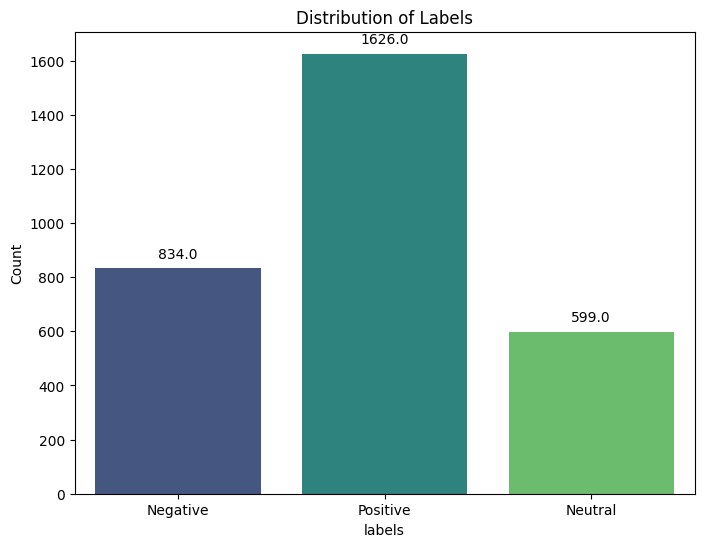

In [83]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='viridis')

plt.title('Distribution of Labels')
plt.xlabel('labels')
plt.ylabel('Count')

# Show count values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [85]:
# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text1)
sequences = tokenizer.texts_to_sequences(text1)
tokenizer.fit_on_texts(text2)
sequences = tokenizer.texts_to_sequences(text2)

# Pad sequences to a fixed length
maxlen = 100  # Adjust this based on your specific use case
data = pad_sequences(sequences, maxlen=maxlen)
print(data)

# Convert labels to one-hot encoding
label_dict = {label: idx for idx, label in enumerate(set(labels))}
labels = [label_dict[label] for label in labels]
labels = np.array(labels)
labels = np.eye(len(label_dict))[labels]

[[0 0 0 ... 0 1 4]
 [0 0 0 ... 0 1 4]
 [0 0 0 ... 1 6 1]
 ...
 [0 0 0 ... 1 6 1]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 4]]


In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [87]:
from tensorflow.keras.layers import Dropout
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Bidirectional
from keras.layers import GRU


model = Sequential()
model.add(Embedding(input_dim = max_words,
                          output_dim = 300,
                          input_length= X_train.shape[1],
                          trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(128,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(256,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(128,return_sequences=False)))
model.add(Dense(64,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 300)          3000000   
                                                                 
 dropout_22 (Dropout)        (None, 100, 300)          0         
                                                                 
 bidirectional (Bidirection  (None, 100, 256)          330240    
 al)                                                             
                                                                 
 dropout_23 (Dropout)        (None, 100, 256)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 512)          789504    
 onal)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 100, 512)        

In [91]:
# Define your optimizer: Adam
your_optimizer = Adam(learning_rate=0.001)

# Use Mean Squared Error (MSE) as the loss function
your_loss = MeanSquaredError()

# Use Mean Absolute Error (MAE) as the metric
mae_metric = MeanAbsoluteError()

# Compile the model with the optimizer, loss function (MSE), and MAE metric
model.compile(optimizer=your_optimizer, loss=your_loss, metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mse', metrics=['accuracy'] [mae_metric])

In [92]:

 #Train the model
h=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=100,shuffle=1,verbose=1)


Epoch 1/10
25/25 [==============================] - 53s 2s/step - loss: 0.1942 - accuracy: 0.5382 - val_loss: 0.1812 - val_accuracy: 0.6176
Epoch 2/10
25/25 [==============================] - 37s 1s/step - loss: 0.1870 - accuracy: 0.5611 - val_loss: 0.1748 - val_accuracy: 0.6176
Epoch 3/10
25/25 [==============================] - 36s 1s/step - loss: 0.1871 - accuracy: 0.5497 - val_loss: 0.1728 - val_accuracy: 0.6176
Epoch 4/10
25/25 [==============================] - 39s 2s/step - loss: 0.1856 - accuracy: 0.5619 - val_loss: 0.1741 - val_accuracy: 0.6176
Epoch 5/10
25/25 [==============================] - 36s 1s/step - loss: 0.1864 - accuracy: 0.5607 - val_loss: 0.1737 - val_accuracy: 0.5915
Epoch 6/10
25/25 [==============================] - 36s 1s/step - loss: 0.1856 - accuracy: 0.5689 - val_loss: 0.1760 - val_accuracy: 0.5915
Epoch 7/10
25/25 [==============================] - 36s 1s/step - loss: 0.1857 - accuracy: 0.5640 - val_loss: 0.1755 - val_accuracy: 0.6176
Epoch 8/10
25/25 [==

In [93]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

20/20 [==============================] - 4s 194ms/step - loss: 0.1771 - accuracy: 0.5931
Test Loss: 0.17705920338630676
Test Accuracy: 0.593137264251709


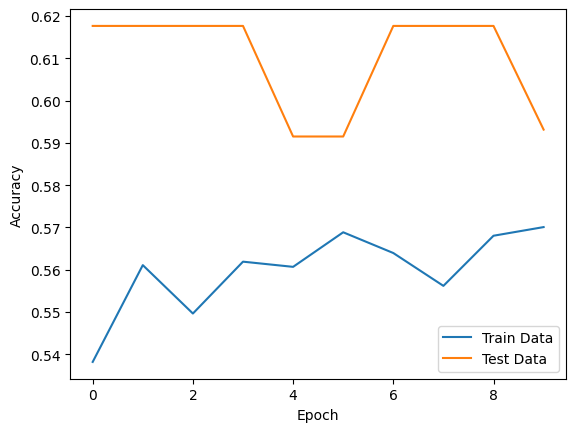

In [96]:
plt.plot(h.history['accuracy'], label='Train Data')
plt.plot(h.history['val_accuracy'], label='Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1])vj,vjvgj,fvi65deu6
plt.legend(loc='best')
plt.show()

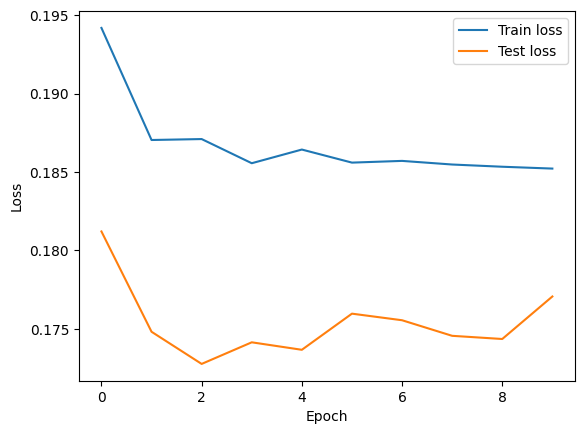

In [97]:
plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()